# Logistic Regression: banking Marketing Campaign

## 1. Import modules, data download and data frame inspection! 

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### 1.1. Data download 

In [2]:
data_url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data_df=pd.read_csv(data_url, sep=';')

### 1.2. Data inspection 

In [3]:
data_df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- There are 21 columns with 11 categorical and 10 numerical features! 
- No missing values across all features! 

### 1.3. Test-train split 

In [5]:
training_df, testing_df=train_test_split(data_df, test_size=0.25) 

## 2. EDA 
### 2.1. Baseline model performance

In [6]:
# inspecting yes/no column 

training_df['y'].value_counts()

y
no     27445
yes     3446
Name: count, dtype: int64

In [7]:
model_accuracy = (training_df['y'].value_counts()['no']/len(training_df['y']))*100
print(f"Accuracy of constant 'no' model: {model_accuracy:.1f}%")

Accuracy of constant 'no' model: 88.8%


### 2.2. Univariate Analysis 
#### 2.2.1. Categorical features inspection

In [8]:
categorical_features=['y','job','education','marital','default','housing','loan','contact','poutcome','day_of_week','month']



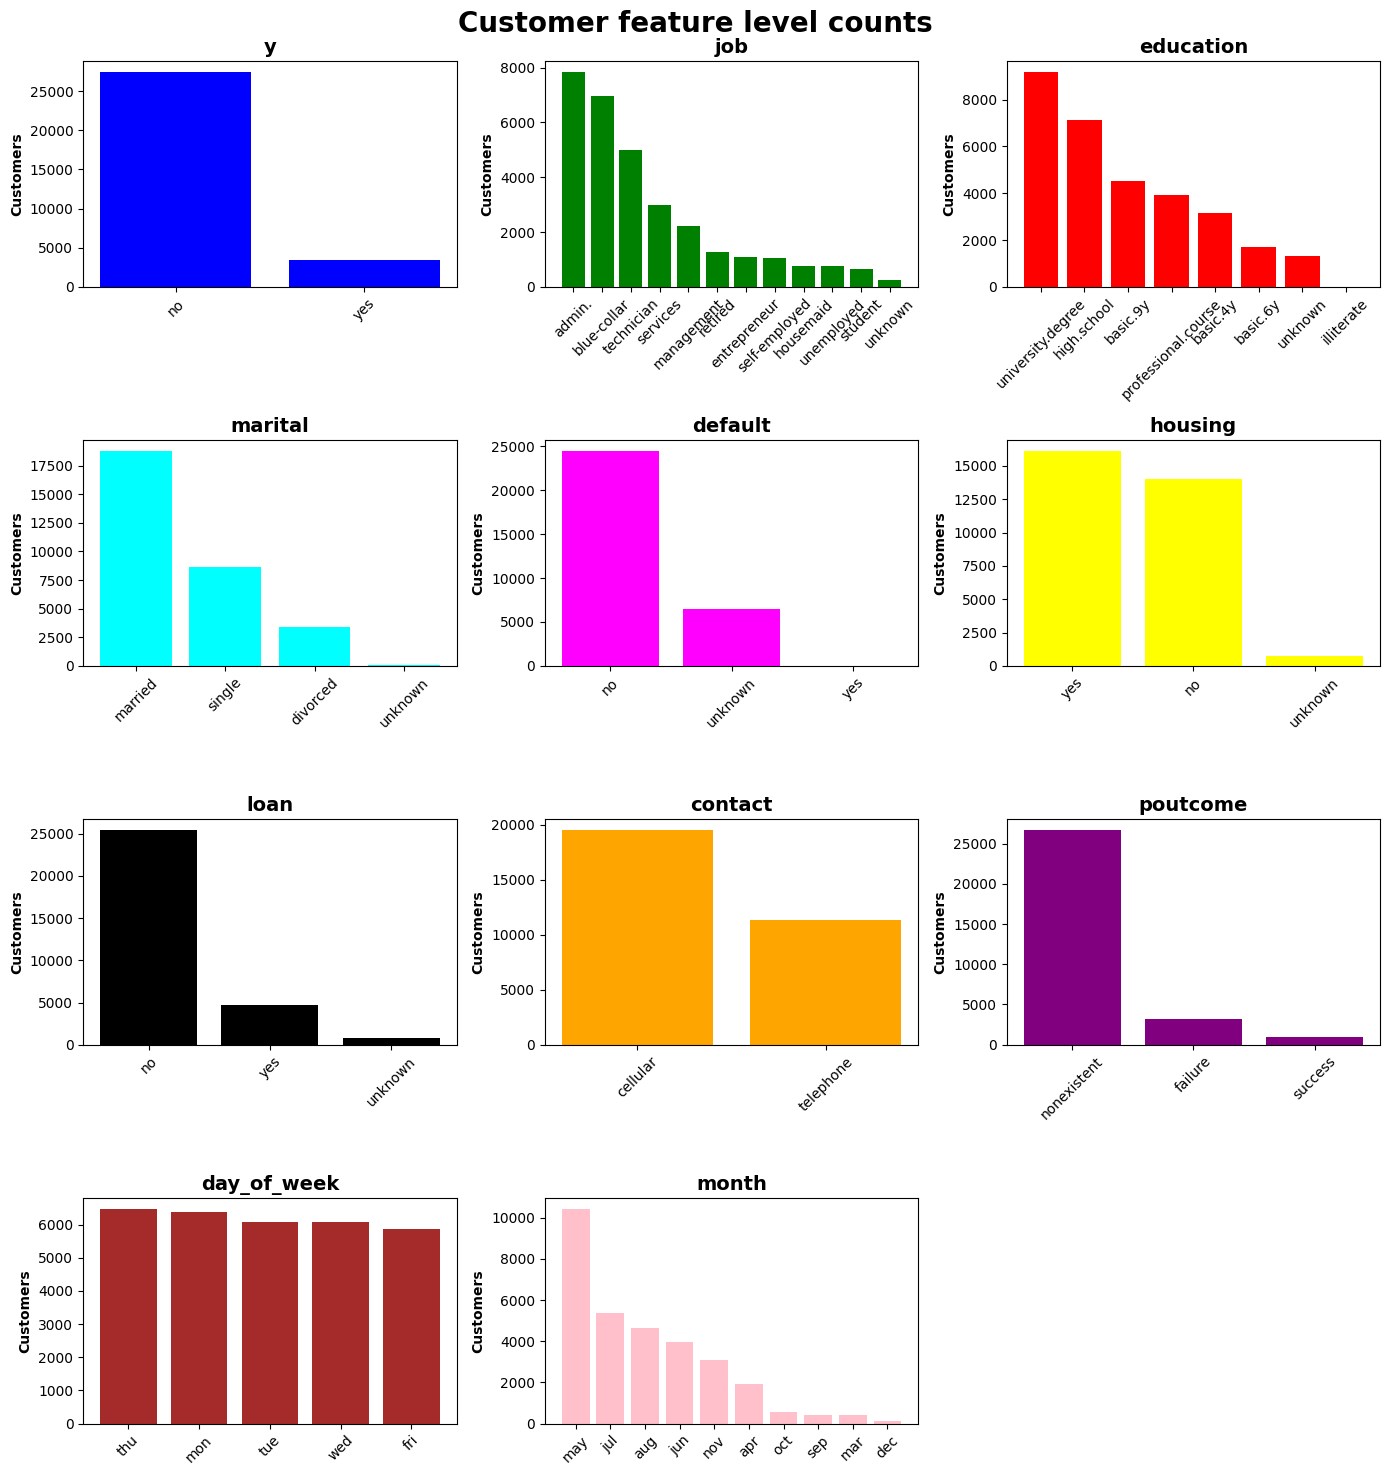

In [9]:
fig, axs=plt.subplots(4,3, figsize=(14,15))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink']

axs[11].remove()
fig.suptitle('Customer feature level counts', fontsize=20, fontweight='bold')

for i, feature in enumerate(categorical_features):
    if i == 11:
        continue 
    # Plot neighborhood group level counts
    level_counts=training_df[feature].value_counts()

    axs[i].set_title(feature, fontsize=14, fontweight='bold')
    axs[i].bar(list(range(len(level_counts))), level_counts, tick_label=level_counts.index, color=colors[i % len(colors)])
    axs[i].tick_params(axis='x', labelrotation=45)
    axs[i].set_ylabel('Customers', fontweight='bold')

fig.tight_layout()
fig.show()

#### 2.2.2. Numerical features inspection 

In [10]:
numerical_features=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

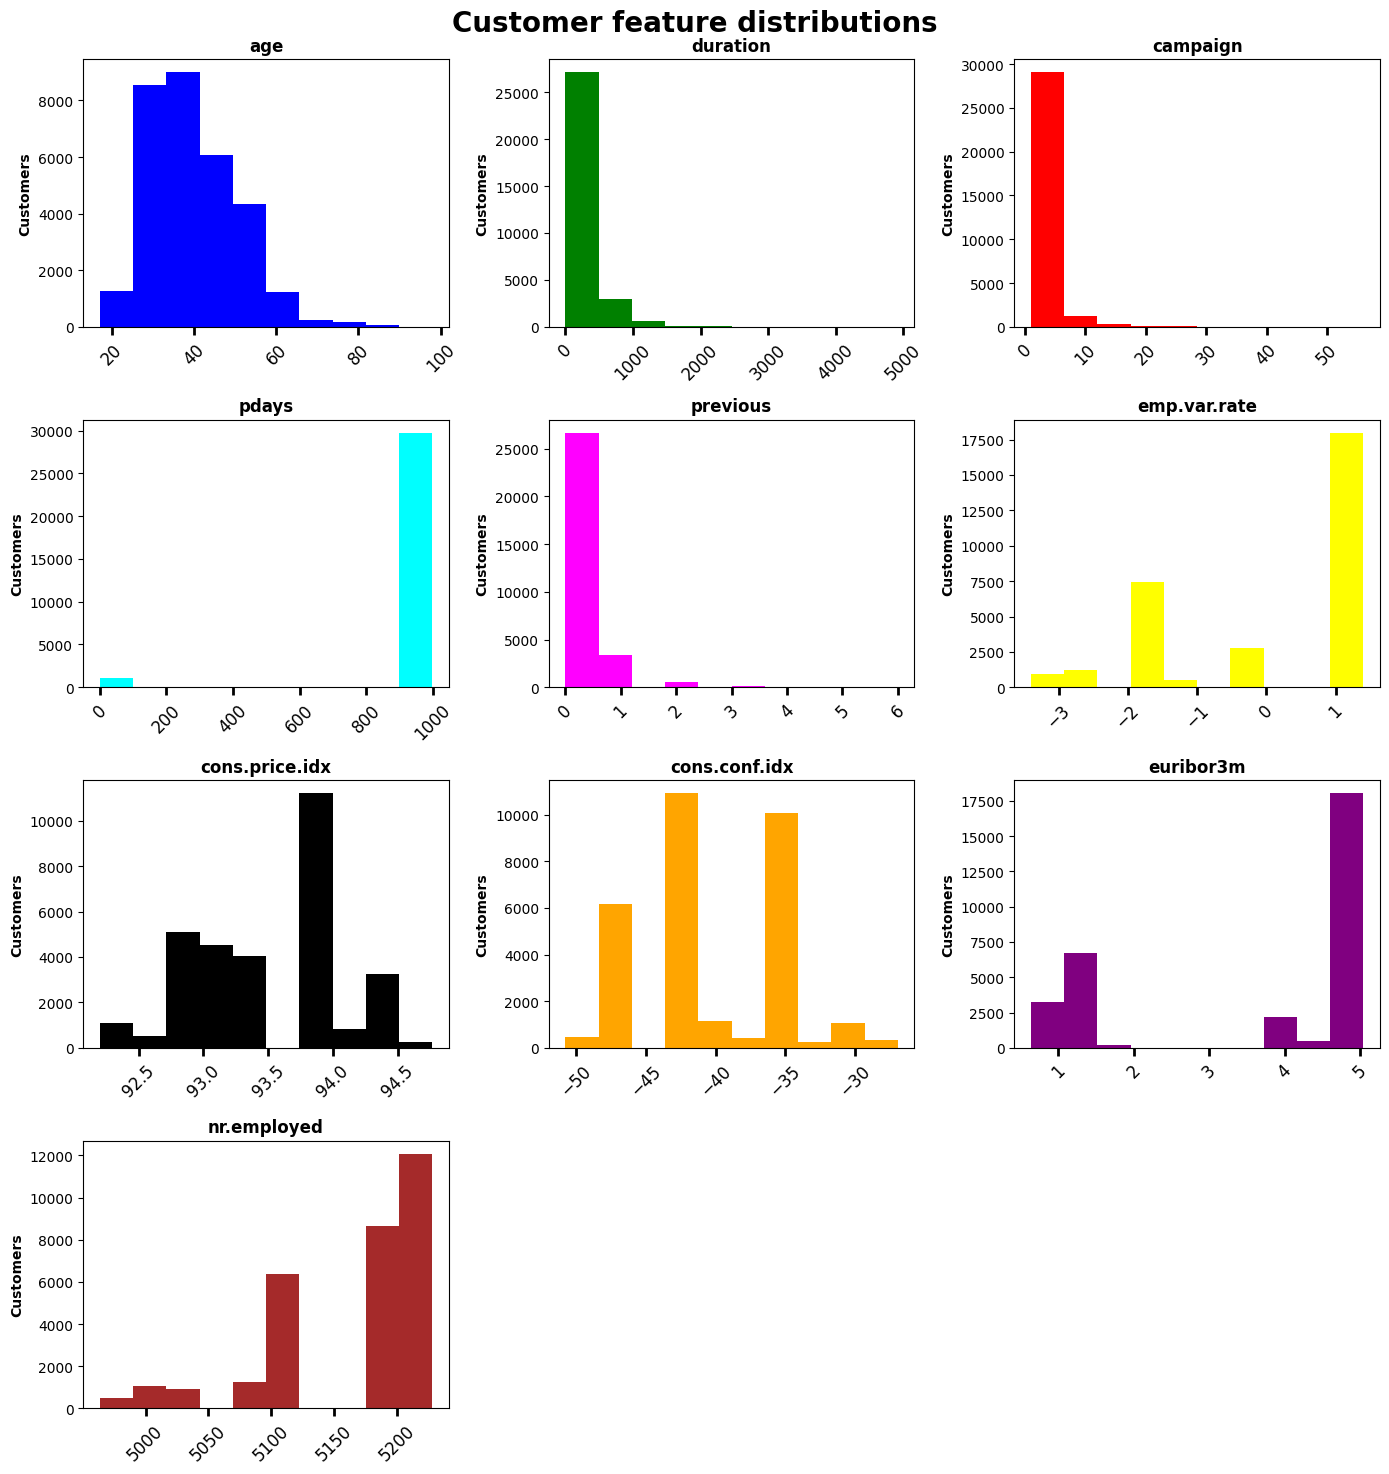

In [11]:
fig, axs=plt.subplots(4,3, figsize=(14,15))
axs=axs.flatten()
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
axs[10].remove()
axs[11].remove()
fig.suptitle('Customer feature distributions', fontsize=20, fontweight='bold')

for i, feature in enumerate(numerical_features):
    if i == 10 and 11:
        continue 
    axs[i].set_title(feature, fontweight='bold')
    axs[i].hist(training_df[feature], color=colors[i % len(colors)])
    axs[i].tick_params(axis='x', length=6, width=2, labelsize=12, labelrotation=45)
    axs[i].set_ylabel('Customers', fontweight='bold')

fig.tight_layout()
fig.show()

### 2.3. Multivariate Analysis 
#### 2.3.1. Categorical features vs y/n feature 

In [12]:
categorical_features=['job','marital','default','housing','loan','contact','poutcome','day_of_week','month']

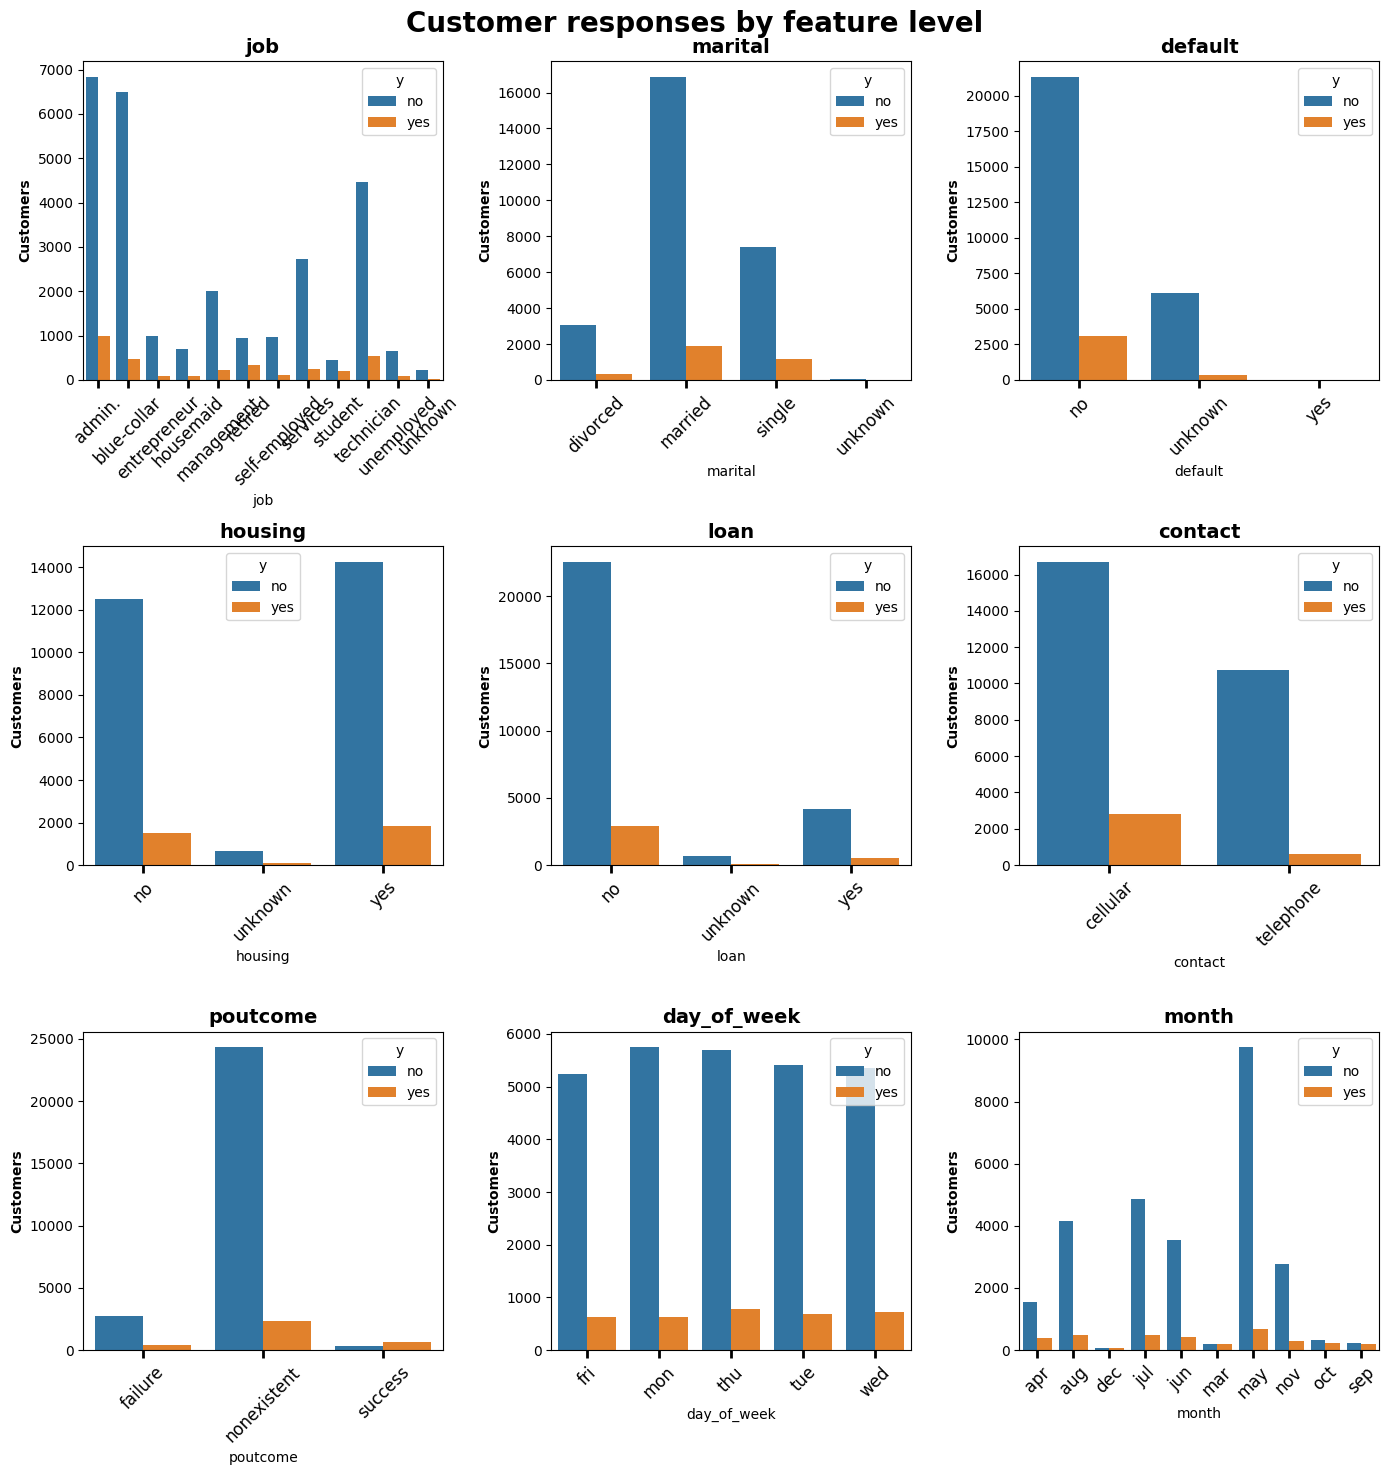

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(14, 15))
axs = axs.flatten()

fig.suptitle('Customer responses by feature level', fontsize=20, fontweight='bold')

for i, feature in enumerate(categorical_features):
    groups = training_df.groupby([feature, 'y']).size()
    groups_df = groups.reset_index()
    groups_df.rename({0: 'Customers'}, axis=1, inplace=True)

    axs[i].set_title(f'{feature}', fontsize=14, fontweight='bold')
    sns.barplot(data=groups_df, x=feature, y='Customers', hue='y', ax=axs[i])
    axs[i].tick_params(axis='x', length=6, width=2, labelsize=12, labelrotation=45)
    axs[i].set_ylabel('Customers', fontweight='bold')

fig.tight_layout()
fig.show()

#### 2.3.2. Numerical features vs y/n feature

In [14]:
numerical_features=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']


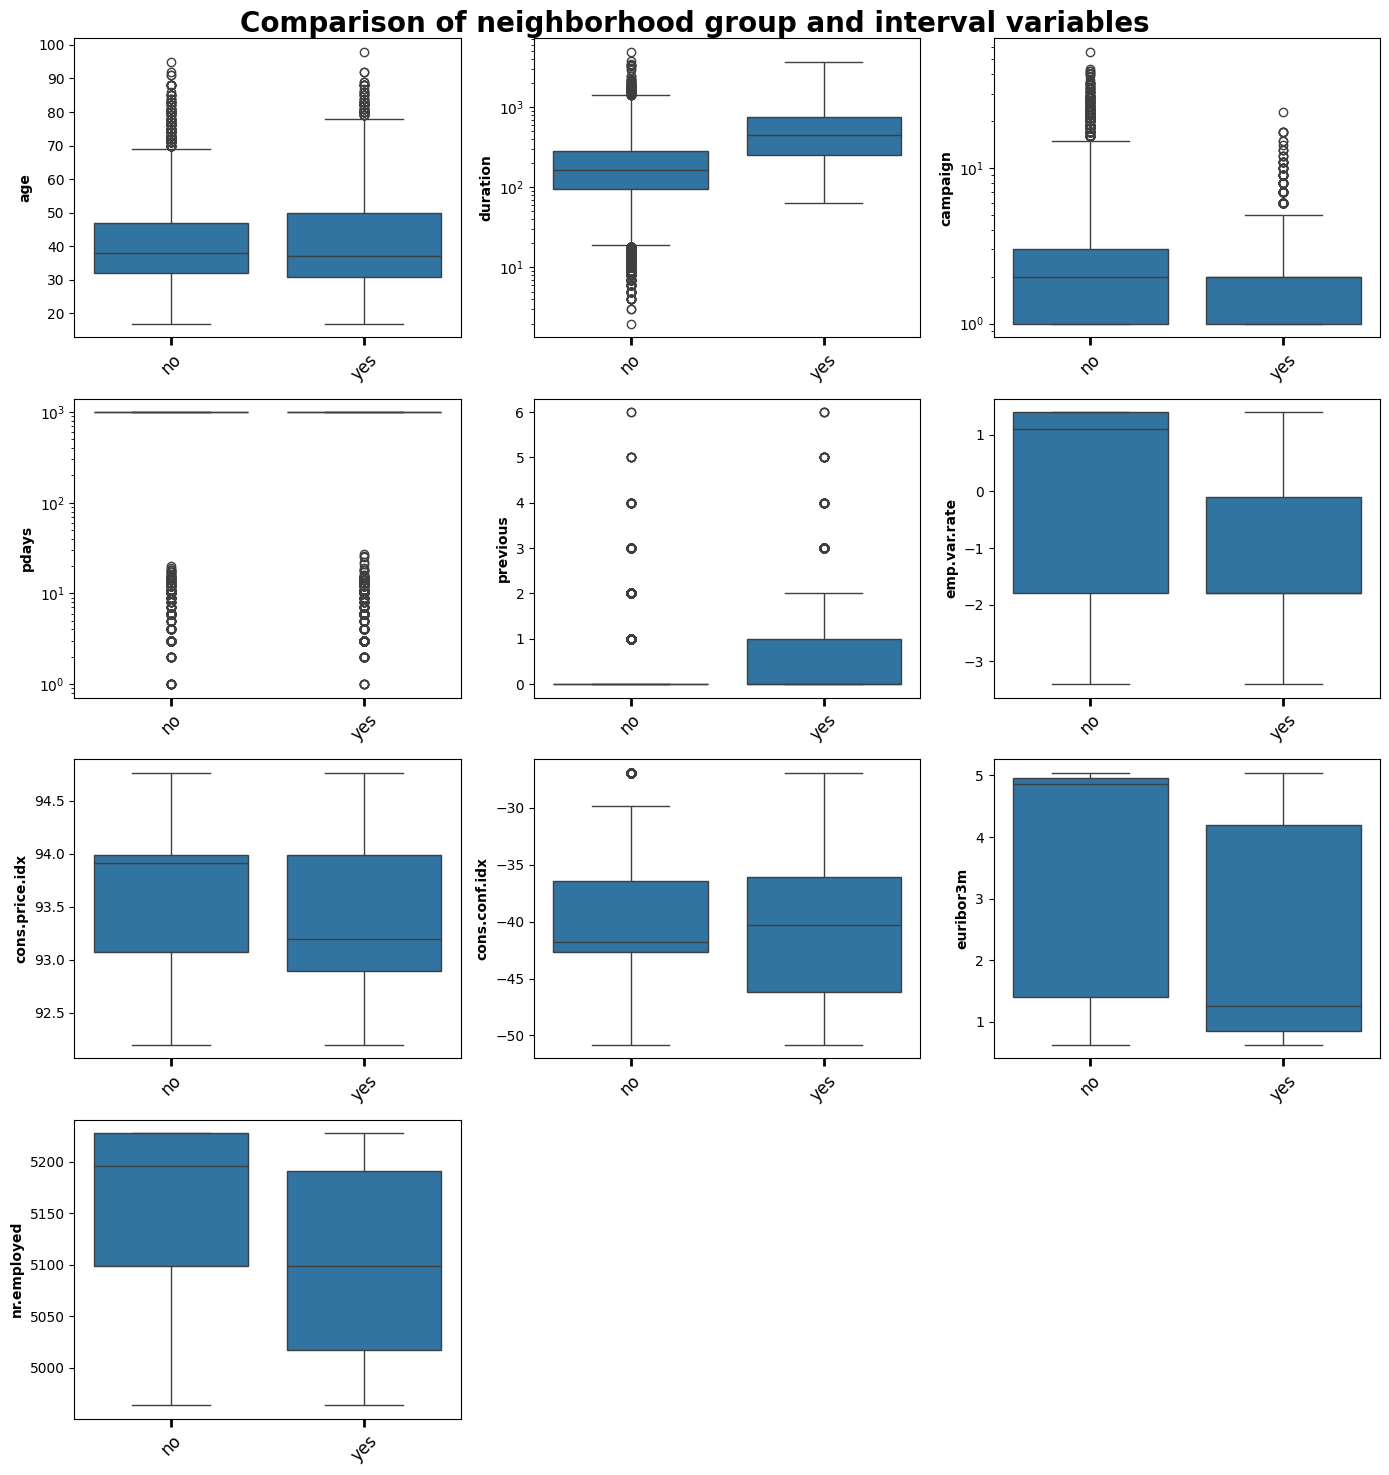

In [15]:
fig, axs=plt.subplots(4,3, figsize=(14,15))
axs=axs.flatten()
axs[10].remove()
axs[11].remove()

fig.suptitle('Comparison of neighborhood group and interval variables', fontsize=20, fontweight='bold')

for i, feature in enumerate(numerical_features):
    
    plot_df=training_df[training_df[feature] != 0]

    if stats.kurtosis(plot_df[feature].dropna()) > 20:
        log_scale=True
    else:
        log_scale=False
    
    sns.boxplot(training_df, x='y', y=feature, log_scale=log_scale, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=45, length=6, width=2, labelsize=12)
    axs[i].set_xlabel('')
    axs[i].set_ylabel(feature, fontweight='bold')

plt.tight_layout()
plt.show()

- 'pdays' has no useful data and can be removed! 

#### 2.3.3. Drop 'pday' feature from the original dataframe  

In [17]:
drop_features=['pdays']
training_df.drop(drop_features, axis=1, inplace=True)
testing_df.drop(drop_features, axis=1, inplace=True)

In [18]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30891 entries, 3836 to 15919
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30891 non-null  int64  
 1   job             30891 non-null  object 
 2   marital         30891 non-null  object 
 3   education       30891 non-null  object 
 4   default         30891 non-null  object 
 5   housing         30891 non-null  object 
 6   loan            30891 non-null  object 
 7   contact         30891 non-null  object 
 8   month           30891 non-null  object 
 9   day_of_week     30891 non-null  object 
 10  duration        30891 non-null  int64  
 11  campaign        30891 non-null  int64  
 12  previous        30891 non-null  int64  
 13  poutcome        30891 non-null  object 
 14  emp.var.rate    30891 non-null  float64
 15  cons.price.idx  30891 non-null  float64
 16  cons.conf.idx   30891 non-null  float64
 17  euribor3m       30891 non-null  f

### 2.4. Feature encoding and scaling 
#### 2.4.1. Categorical features - 'one hot' encoding 

In [22]:
categorical_features=['job','marital','default','housing','loan','contact','poutcome']

encoder=OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(training_df[categorical_features])
encoded_training_features=encoder.transform(training_df[categorical_features])
encoded_testing_features=encoder.transform(testing_df[categorical_features])

encoded_training_features_df=pd.DataFrame(encoded_training_features, columns=encoder.get_feature_names_out())

encoded_testing_features_df=pd.DataFrame(encoded_testing_features, columns=encoder.get_feature_names_out())

encoded_training_features_df.head().T

,0,1,2,3,4
job_blue-collar,0.0,1.0,0.0,0.0,0.0
job_entrepreneur,0.0,0.0,0.0,0.0,0.0
job_housemaid,0.0,0.0,0.0,0.0,0.0
job_management,0.0,0.0,0.0,1.0,0.0
job_retired,0.0,0.0,1.0,0.0,0.0
job_self-employed,0.0,0.0,0.0,0.0,0.0
job_services,0.0,0.0,0.0,0.0,0.0
job_student,0.0,0.0,0.0,0.0,0.0
job_technician,1.0,0.0,0.0,0.0,1.0
job_unemployed,0.0,0.0,0.0,0.0,0.0


#### 2.4.2. Numerical feature scaling 

In [23]:
numerical_features=['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

standard_scaler=StandardScaler().fit(training_df[numerical_features])
scaled_training_features=standard_scaler.transform(training_df[numerical_features])
scaled_testing_features=standard_scaler.transform(testing_df[numerical_features])

scaled_training_features_df=pd.DataFrame(
    scaled_training_features,
    columns=numerical_features
)

scaled_testing_features_df=pd.DataFrame(
    scaled_testing_features,
    columns=numerical_features
)

scaled_training_features_df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04,3.089100e+04
mean,3.818267e-17,-6.693469e-17,-4.600322e-18,2.944206e-17,2.254158e-17,-2.156585e-14,-7.369716e-16,-2.760193e-17,-2.266142e-14
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-2.206469e+00,-9.945705e-01,-5.644127e-01,-3.468684e-01,-2.215920e+00,-2.375120e+00,-2.224738e+00,-1.719690e+00,-2.805886e+00
25%,-7.680039e-01,-6.015421e-01,-5.644127e-01,-3.468684e-01,-1.197168e+00,-8.658228e-01,-4.769055e-01,-1.310637e+00,-9.345163e-01
50%,-1.926180e-01,-3.009910e-01,-2.047075e-01,-3.468684e-01,6.493200e-01,2.980976e-01,-2.827019e-01,7.133117e-01,3.347005e-01
75%,6.704609e-01,2.346064e-01,1.549978e-01,-3.468684e-01,8.403360e-01,7.211843e-01,8.825194e-01,7.732294e-01,8.470829e-01
max,5.561241e+00,1.795556e+01,1.921938e+01,1.166559e+01,8.403360e-01,2.056066e+00,2.932446e+00,8.216244e-01,8.470829e-01


#### 2.4.3. Time feature encoding 

In [24]:
def encode_time_features(data_df: pd.DataFrame) -> pd.DataFrame:
    '''Takes a Pandas dataframe and uses cyclical sin/cos to encode
    month and day features. Returns updated dataframe.'''

    time_df=data_df.copy()

    # First convert the features to numeric
    dict={'mon' : '1', 'tue' : '2', 'wed': '3', 'thu' : '4', 'fri': '5'}
    time_df['day_of_week']=time_df['day_of_week'].replace(dict)

    dict={'jan' : '1', 'feb' : '2', 'mar': '3', 'apr' : '4', 'may': '5', 'jun': '6', 'jul': '7', 'aug': '8', 'sep': '9', 'oct': '10', 'nov': '11', 'dec': '12'}
    time_df['month']=time_df['month'].replace(dict)

    # And fix the dtypes
    time_df['day_of_week']=time_df['day_of_week'].astype(float)
    time_df['month']=time_df['month'].astype(float)

    # Now encode the day and month with sin/cos components
    time_df['day_sin']=np.sin(2 * np.pi * time_df['day_of_week']/7.0)
    time_df['day_cos']=np.cos(2 * np.pi * time_df['day_of_week']/7.0)

    time_df['month_sin']=np.sin(2 * np.pi * time_df['month']/12.0)
    time_df['month_cos']=np.cos(2 * np.pi * time_df['month']/12.0)

    # Drop the original string features
    time_df.drop(['month', 'day_of_week'], axis=1, inplace=True)

    return time_df.reset_index(drop=True)

training_time_features=encode_time_features(training_df[['day_of_week', 'month']])
testing_time_features=encode_time_features(testing_df[['day_of_week', 'month']])

training_time_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30891 entries, 0 to 30890
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   day_sin    30891 non-null  float64
 1   day_cos    30891 non-null  float64
 2   month_sin  30891 non-null  float64
 3   month_cos  30891 non-null  float64
dtypes: float64(4)
memory usage: 965.5 KB


#### 2.4.4. Label encoding 

In [25]:
label_encoder=LabelEncoder().fit(training_df['y'])
training_labels=label_encoder.transform(training_df['y'])
testing_labels=label_encoder.transform(testing_df['y'])

#### 2.4.5. Final training features 

In [26]:
training_features=pd.concat([encoded_training_features_df, scaled_training_features_df, training_time_features], axis=1)
testing_features=pd.concat([encoded_testing_features_df, scaled_testing_features_df, testing_time_features], axis=1)




## 3. Model training 

In [27]:
model=LogisticRegression()
model.fit(training_features, training_labels)

test_predictions=model.predict(testing_features)
test_accuracy=accuracy_score(testing_labels, test_predictions)*100
print(f'Test set accuracy: {test_accuracy:.2f}%')

Test set accuracy: 90.56%
